**Metadata Information regarding UCI heart disease dataset**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 	 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: Heart disease (0 = no, 1 = yes)

**Import the libraries**

In [105]:
import numpy as npa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the data set**

In [106]:
df=pd.read_csv('../input/heart.csv')

In [107]:
#Check first few rows in the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**There are 303 rows and 14 columns present in the dataset**

In [108]:
df.shape

(303, 14)

check the columns in the dataset and presence of null values

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


There are no columns containing null values

**Replacing sex and target columns with more readable values instaed of 0 and 1**

In [110]:
df.replace({"sex": {1: 'Male', 0:'Female'}}, inplace=True)   
df.replace({"target":{1:'Yes', 0:'No'}}, inplace=True)

**Check the number of Male and Female patient records in the data set and draw a count plot showing the same. The number of Male patients is more in this sample**

In [111]:
df['sex'].value_counts()

Male      207
Female     96
Name: sex, dtype: int64

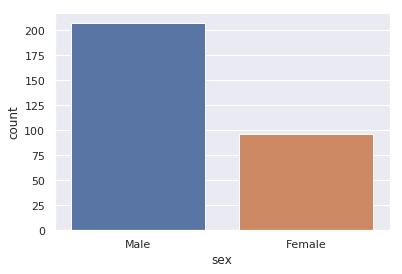

In [112]:
sns.countplot(x=df['sex'],data=df)

**We have 303 records(207 Male, 96 Female). Now let us see the number of Male and Female patients having heart disease (target=Yes)**

In [113]:
df[(df['sex']=='Male') & (df['target']=='Yes')].shape

(93, 14)

In [114]:
df[(df['sex']=='Female') & (df['target']=='Yes')].shape

(72, 14)

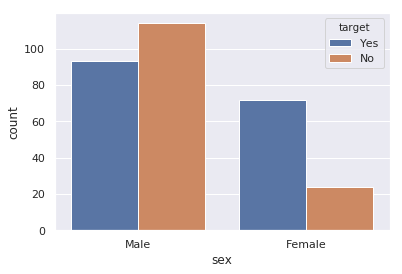

In [115]:
sns.countplot(x=df['sex'],hue=df['target'],data=df)

**Let us see the age wise distribution of patients in the sample data set using a histogram. The histogram shows majority of patients are in the agegroup 40 to 65**

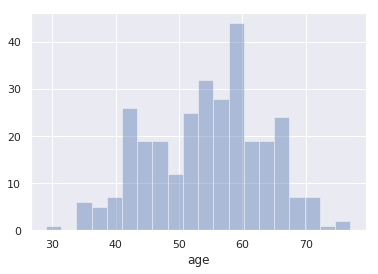

In [116]:
sns.set(color_codes=True)
sns.distplot(df['age'],bins=20,kde=False)

**Let us see the age group of Male patients who have a positive heart disease condition. Majority are between age group of 40 to 60**

In [117]:
male_data=df[(df['sex']=='Male') & (df['target']=='Yes')]


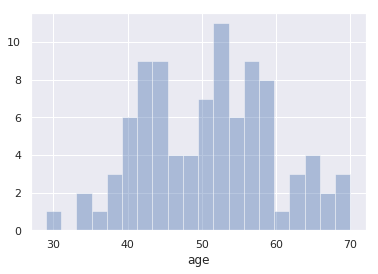

In [118]:
sns.distplot(male_data['age'],bins=20,kde=False)

**Similarly the age group of Female patients having positive heart disease condition.  Majority age group lies between 40 to 65 **

In [119]:
female_data=df[(df['sex']=='Female') & (df['target']=='Yes')]

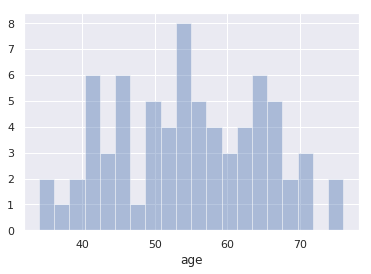

In [120]:
sns.distplot(female_data['age'],bins=20,kde=False)

Looks like Male patients in the age group of 40 to 60 
have are having positive heart disease condition. Female patients in the age group of  40 to 65 are having positive heart disease condition

**Lets see of there is any relation between resting blood pressure and cholesterol level for patients who have positive heart disease condition**

In [121]:
positive_cases=df[df['target']=='Yes']


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


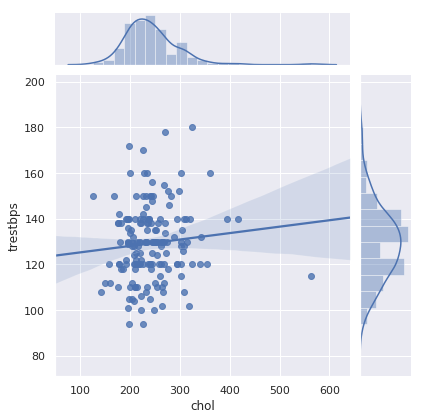

In [122]:
sns.jointplot(positive_cases['chol'],positive_cases['trestbps'],kind='reg')

Jointplot on the rest bp and cholestrol show a mild linear relationship

Letus look at all the positive heart disease cases and see if the fbs(fasting blood sugar > 120 i.e. value 1) has any impact on heart disease

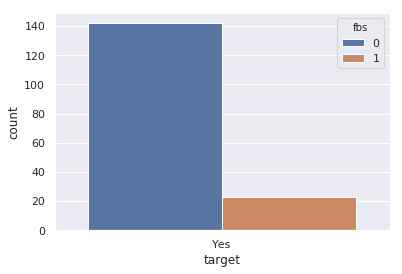

In [123]:
sns.countplot(x=positive_cases['target'],hue=positive_cases['fbs'],data=positive_cases)

Looks like around 15% positive cases had fbs>120

**Exercise induced angina (exang) in positive heart disease cases **

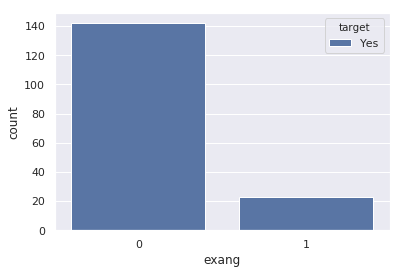

In [124]:
sns.countplot(x=positive_cases['exang'], hue=positive_cases['target'],data=positive_cases)

This again shows that around 15% of heart disease cases had exercise induced angina

**Let us see a distribution of cholestoral in positive heart disease cases **

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


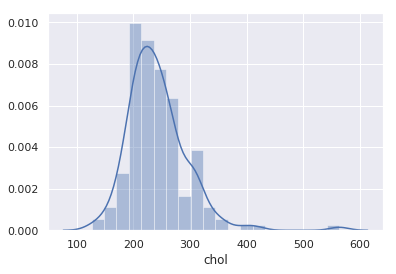

In [125]:
sns.distplot(positive_cases['chol'],bins=20,kde=True)

From the histogram it looks like most of the positive cases have cholestrol level between 200 to 300 

**checking slope parameter on the positive cases**

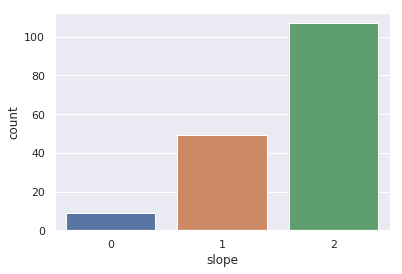

In [126]:
sns.countplot(x=positive_cases['slope'], data=positive_cases)

lets see a corelation matrix and draw a heat map to check if there is any correlation exists between age, trestbps, chol,thalach,oldpeak for the patients diagnosed with positive heart disease

In [127]:
corr_var=positive_cases[['age', 'trestbps', 'chol','thalach','oldpeak']]
cv=corr_var.corr()
cv

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.274698,0.257154,-0.525801,0.174594
trestbps,0.274698,1.000000,0.093291,0.028039,0.181501
chol,0.257154,0.093291,1.000000,0.014455,0.057718
thalach,-0.525801,0.028039,0.014455,1.000000,-0.182040
oldpeak,0.174594,0.181501,0.057718,-0.182040,1.000000


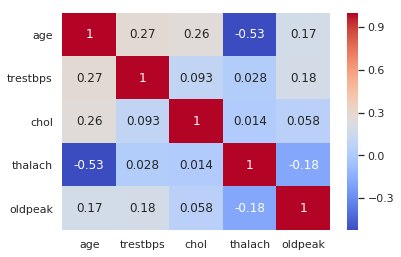

In [128]:
sns.heatmap(cv,cmap='coolwarm',annot=True)

There is some positive correlation between increase in age and increase in level of cholestroal, restbp,oldpeak(ST depression induced by exercise relative to rest). 

More number of patients diagnosed for positive heart disease have the slope of the peak exercise ST segment Value 2: flat

The following conclusions can be drawn based on the EDA done so far
1. Though the sample got more Male patient records(207 male, 96 Female), the positive heart disease cases are more in Female patients(72 out of 96) versus (93 out of 207)
2. as per the sample, Male patients in the age group of 40 - 60 years of age  were diagnosed with heart disease. Similarly Female patients in the age group of 40-65 had heart disease
3. Increased level of cholestrol has some linear relationship with resting blood pressure
4. Around 15% patients with Fasting blood sugar >120 mg/dl were diagnosed with Heart disease
5. Around 15% of heart disease cases had exercise induced angina
6. Most of the positive cases have cholestrol level between 200 to 300 
7. More number of patients diagnosed for positive heart disease have the slope of the peak exercise ST segment Value    as 2: flat
8. There is some positive correlation between increase in age and increase in level of cholestroal, restbp,oldpeak(ST depression induced by exercise relative to rest). 

Conclusion :- From the EDA and anslysis on the Positive Heart disease cases, it is clear that there is not a single factor which has caused the disease. Infact all the parameters contribute to some extent to cause the disease